# Using HII region catalog data

## Import some packages

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

## Some useful functions

In [19]:
def read_csv(file_path):
    if not os.path.isfile(file_path):
        print("File csv does not exists: {}".format(file_path))
        return None
    try:
        with open(file_path, "r") as file_input:
            lines = []
            for line in file_input:
                if line.startswith("#  COLUMN"):
                    lines.append(line.split()[2])
        table_df = pd.read_csv(file_path, comment='#', header=None)
        table_df.columns = lines
        table_df.set_index(lines[0], inplace=True)
    except:
        print('somethings wrong with csv file: {}'.format(file_path))
        return None
    return table_df

In [20]:
def kauffmann(log_NIIHa):
    val = 0.61 / (log_NIIHa - 0.05) + 1.3
    return val


def kewley(log_NIIHa):
    val = 0.61 / (log_NIIHa - 0.47) + 1.19
    return val

## Using CSV files

### Start example

Reading physical properties file

In [21]:
data_phys = read_csv('example_data/HII.NGC5947.phys_props.csv')

Reading emission lines file

In [22]:
data_elines = read_csv('example_data/HII.NGC5947.flux_elines.diff_corr.csv')

### Data structure

Emission line table [See description at paper]()

In [23]:
data_elines

,GALNAME,CALIFAID,X,Y,RA,DEC,fluxOII3727,e_fluxOII3727,EWOII3727,e_EWOII3727,...,EWHeI6677,e_EWHeI6677,fluxSII6716,e_fluxSII6716,EWSII6716,e_EWSII6716,fluxSII6730,e_fluxSII6730,EWSII6730,e_EWSII6730
HIIREGID,,,,,,,,,,,,,,,,,,,,,
NGC5947-1,NGC5947,4034,41.850430,35.173725,232.652480,42.717148,30.344722,2.499180,-2.653063,11.510038,...,-0.001771,0.865440,26.400392,0.480153,-0.898052,0.658534,39.119732,0.704297,-1.353843,0.957339
NGC5947-2,NGC5947,4034,65.846896,34.271254,232.643408,42.716897,36.920355,0.714433,-29.061797,56.452894,...,0.000000,13.407861,10.525877,0.113683,-13.603201,3.319890,9.596698,0.142719,-12.420087,4.178072
NGC5947-3,NGC5947,4034,15.890182,51.106032,232.662296,42.721574,35.828049,0.658182,-72.299379,142.910749,...,0.000000,21.578408,6.608955,0.090989,-16.901413,5.940526,5.517757,0.140640,-14.342867,8.200955
NGC5947-4,NGC5947,4034,62.881002,42.178650,232.644529,42.719094,35.967703,0.821383,-47.293461,71.861312,...,0.000000,17.865385,8.500424,0.131818,-13.834064,5.362772,8.077720,0.145727,-13.156798,5.979173
NGC5947-5,NGC5947,4034,42.131879,25.741586,232.652374,42.714528,14.811720,0.716550,-9.083170,22.184407,...,0.000000,3.018453,6.201785,0.136505,-3.278493,1.747325,4.159181,0.186700,-2.186360,2.170322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NGC5947-84,NGC5947,4034,33.411671,60.960764,232.655671,42.724311,6.073777,0.772436,-30.476148,120.361806,...,0.000000,10.871461,1.465337,0.094041,-7.454254,9.159911,0.210101,0.130145,-1.392377,11.556122
NGC5947-85,NGC5947,4034,51.985545,14.301454,232.648648,42.711350,6.366611,0.910604,-20.330900,101.475148,...,-0.032788,6.499565,1.277723,0.103893,-2.901322,5.804539,1.174245,0.136271,-2.872432,7.036213
NGC5947-86,NGC5947,4034,73.005759,35.572923,232.640701,42.717259,6.773491,0.825586,-13.970142,77.536837,...,-3.169081,40.549384,0.027882,0.208475,-0.617622,20.813481,0.028060,0.234666,-0.602694,25.378094


Physical properties table [See description at paper](TBD)

In [24]:
data_phys

,f_y,dist,Av,OH_M13_N2,OH_M13_O3N2,OH_T04,OH_Pet04_N2_lin,OH_Pet04_N2_poly,OH_Pet04_O3N2,OH_Kew02_N2O2,...,edq_IZI_J_byler_CSFR,euq_IZI_J_byler_CSFR,edq_IZI_mean_byler_CSFR,euq_IZI_mean_byler_CSFR,edq_IZI_max_byler_CSFR,euq_IZI_max_byler_CSFR,eNH_Pil16_R,eNO_HCm_no_interp,eNO_HCm_interp,eNe_Oster_S
HIIREGID,,,,,,,,,,,,,,,,,,,,,
NGC5947-1,0.060358,0.209287,1.322924,8.617754,8.553017,9.164450,NaN,NaN,8.759932,9.253824,...,0.484848,0.151515,0.123843,0.239793,0.303030,0.060606,0.026611,0.36,0.36,0.030215
NGC5947-2,0.354353,2.324010,0.436849,8.503156,8.456129,8.932649,8.604088,8.610956,8.615053,8.957955,...,0.454545,0.181818,0.131770,0.231866,0.272727,0.090909,0.010886,0.26,0.26,0.034484
NGC5947-3,0.454061,2.918088,0.426207,8.426792,8.329626,8.735324,8.509873,8.468272,8.425889,8.843915,...,0.333333,0.151515,0.097513,0.205518,0.212121,0.090909,0.014377,0.13,0.13,0.072340
NGC5947-4,0.406124,2.399614,0.379301,8.498698,8.436157,8.896418,8.598589,8.601568,8.585188,8.941682,...,0.363636,0.181818,0.096384,0.236949,0.242424,0.090909,0.013086,0.24,0.24,0.041966
NGC5947-5,0.140086,1.408122,0.924254,8.537085,8.545004,9.035138,8.645949,8.687207,8.747950,9.026790,...,0.484848,0.121212,0.122456,0.210878,0.272727,0.060606,0.025109,0.36,0.36,0.475962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NGC5947-84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NGC5947-85,0.232900,2.769256,0.280234,8.568747,8.479619,8.816482,8.685012,8.766559,8.650178,8.948581,...,0.333333,0.212121,0.133985,0.199348,0.212121,0.121212,0.075725,0.35,0.35,0.311948
NGC5947-86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plots

In [9]:
NIIHa = np.log10(data_elines.loc[:, 'fluxNII6583'] / data_elines.loc[:, 'fluxHa6562'])
OIIIHb = np.log10(data_elines.loc[:, 'fluxOIII5006']/data_elines.loc[:, 'fluxHb4861'])
OH = data_phys.loc[:, 'OH_Ho']
U = data_phys.loc[:, 'U_Dors_O32']
Av = data_phys.loc[:, 'Av']

(-1.5, 1.0)

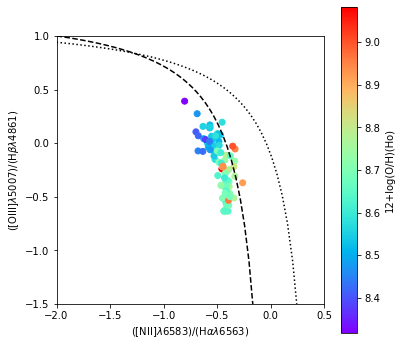

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=OH, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

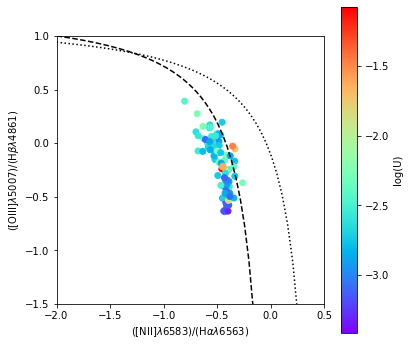

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=U, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('log(U)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

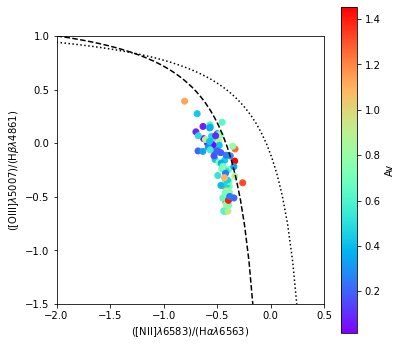

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa, OIIIHb, c=Av, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('Av')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

## Using FITS files

### Reading data

Reading physical properties file

In [13]:
data_phys_fits = fits.open('example_data/HII.NGC5947.phys_props.fits')[1].data

Reading emission lines file

In [14]:
data_elines_fits = fits.open('example_data/HII.NGC5947.flux_elines.diff_corr.fits')[1].data

### Data structure (very long output)

Emission line table [See description at paper]()

In [ ]:
data_elines_fits

Physical properties table [See description at paper](TBD)

In [ ]:
data_phys_fits

### Plots

In [15]:
NIIHa_fits = np.log10(data_elines_fits['fluxNII6583'] / data_elines_fits['fluxHa6562'])
OIIIHb_fits = np.log10(data_elines_fits['fluxOIII5006']/data_elines_fits['fluxHb4861'])
OH_fits = data_phys_fits['OH_Ho']
U_fits = data_phys_fits['U_Dors_O32']
Av_fits = data_phys_fits['Av']

(-1.5, 1.0)

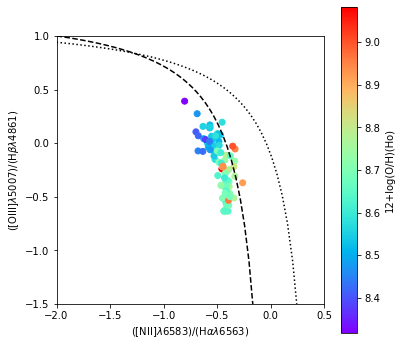

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa_fits, OIIIHb_fits, c=OH_fits, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('12+log(O/H)(Ho)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

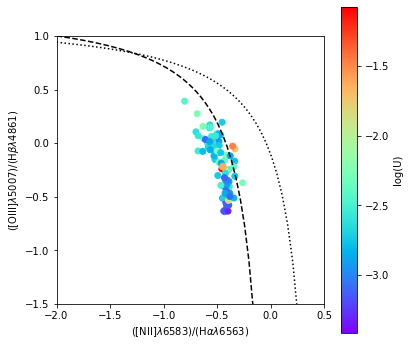

In [17]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa_fits, OIIIHb_fits, c=U_fits, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('log(U)')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)

(-1.5, 1.0)

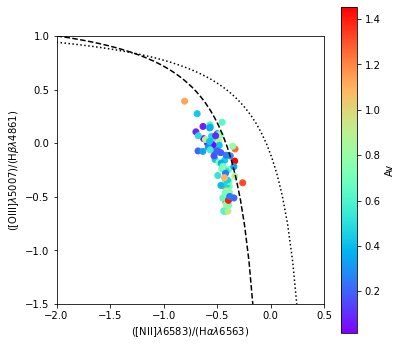

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
# Demarcation lines
kauff_set = np.linspace(-2.0, 0)
kewley_set = np.linspace(-2.0, 0.4)
ax.plot(kauff_set, kauffmann(kauff_set), 'k--')
ax.plot(kewley_set, kewley(kewley_set), 'k:') 
# Plotting data
plot = ax.scatter(NIIHa_fits, OIIIHb_fits, c=Av_fits, cmap='rainbow')
cbar = plt.colorbar(plot, ax=ax)
# Formatting
ax.set_xlabel(r'([NII]$\lambda$6583)/(H$\alpha \lambda$6563)')
ax.set_ylabel(r'([OIII]$\lambda$5007)/(H$\beta \lambda$4861)')
cbar.set_label('Av')
ax.set_aspect('equal')
ax.set_xlim(-2., 0.5)
ax.set_ylim(-1.5, 1)